In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Korinthou'
raceDate = '21/10/2023'
surface = 'Gravel'
competition = 'Cup'

link = 'https://www.ewrc-results.com/results/85986-rally-sprint-graika-2023/?s='
startat, no_ss=443525, int(3)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Papadimitriou,C1,11:48.71,-,62.0,1,Korinthou,21/10/2023,Gravel,Cup,1
1,2,#7,Tsetsonis Elia,C2,12:33.20,+44.49 + 44.49,58.3 3.65,1,Korinthou,21/10/2023,Gravel,Cup,2
2,3,#5,Zygogiannis K.,C2,12:36.86,+48.15 + 3.66,58.0 3.95,1,Korinthou,21/10/2023,Gravel,Cup,3
3,4,#6,Tsoulos Argiri,C2,12:38.28,+49.57 + 1.42,57.9 4.06,1,Korinthou,21/10/2023,Gravel,Cup,4
4,5,#2,Lainopoulos S.,C2,12:47.55,+58.84 + 9.27,57.2 4.82,1,Korinthou,21/10/2023,Gravel,Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,#29,Mantas Panagio,C6 F2,14:45.78,+2:39.49 + 12.22,49.6 13.1,3,Korinthou,21/10/2023,Gravel,Cup,20
20,21,#30,Andrikopoulos,C5 F2,16:06.83,+4:00.54 + 1:21.05,45.4 19.7,3,Korinthou,21/10/2023,Gravel,Cup,21
21,22,#27,Karouzos Giorg,C4 F2,16:16.34,+4:10.05 + 9.51,45.0 20.5,3,Korinthou,21/10/2023,Gravel,Cup,22
22,23,#28,Lathouris Pana,C4 F2,16:27.66,+4:21.37 + 11.32,44.5 21.4,3,Korinthou,21/10/2023,Gravel,Cup,23


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Papadimitriou,C1,1,Korinthou,21/10/2023,Gravel,Cup,1,708.71
1,Tsetsonis Elia,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,753.20
2,Zygogiannis K.,C2,1,Korinthou,21/10/2023,Gravel,Cup,3,756.86
3,Tsoulos Argiri,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,758.28
4,Lainopoulos S.,C2,1,Korinthou,21/10/2023,Gravel,Cup,5,767.55
...,...,...,...,...,...,...,...,...,...
19,Mantas Panagio,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,20,885.78
20,Andrikopoulos,C5 F2,3,Korinthou,21/10/2023,Gravel,Cup,21,966.83
21,Karouzos Giorg,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,22,976.34
22,Lathouris Pana,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,23,987.66


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race      ss          
Korinthou 1     708.71
          2     701.23
          3     726.29

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Korinthou,21/10/2023,Gravel,Cup,1,708.71,708.71,0.00,0.000000,01
1,Tsetsonis Elia,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,753.20,708.71,44.49,6.277603,01
2,Zygogiannis K.,C2,1,Korinthou,21/10/2023,Gravel,Cup,3,756.86,708.71,48.15,6.794034,01
3,Tsoulos Argiri,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,758.28,708.71,49.57,6.994398,01
4,Lainopoulos S.,C2,1,Korinthou,21/10/2023,Gravel,Cup,5,767.55,708.71,58.84,8.302409,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Mantas Panagio,C6 F2,3,Korinthou,21/10/2023,Gravel,Cup,20,885.78,726.29,159.49,21.959548,03
75,Andrikopoulos,C5 F2,3,Korinthou,21/10/2023,Gravel,Cup,21,966.83,726.29,240.54,33.119002,03
76,Karouzos Giorg,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,22,976.34,726.29,250.05,34.428396,03
77,Lathouris Pana,C4 F2,3,Korinthou,21/10/2023,Gravel,Cup,23,987.66,726.29,261.37,35.987002,03


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Korinthou,21/10/2023,Gravel,Cup,1,708.71,708.71,0.00,0.000000,01
1,Tsetsonis Elia,C2,1,Korinthou,21/10/2023,Gravel,Cup,2,753.20,708.71,44.49,6.277603,01
2,Zygogiannis K.,C2,1,Korinthou,21/10/2023,Gravel,Cup,3,756.86,708.71,48.15,6.794034,01
3,Tsoulos Argiri,C2,1,Korinthou,21/10/2023,Gravel,Cup,4,758.28,708.71,49.57,6.994398,01
4,Lainopoulos S.,C2,1,Korinthou,21/10/2023,Gravel,Cup,5,767.55,708.71,58.84,8.302409,01
8,Davaris Nikos,C2,1,Korinthou,21/10/2023,Gravel,Cup,9,794.05,708.71,85.34,12.041597,01
25,Papadopoulos A,C2,1,Korinthou,21/10/2023,Gravel,Cup,26,1058.04,708.71,349.33,49.290965,01
28,Papadimitriou,C1,2,Korinthou,21/10/2023,Gravel,Cup,1,701.23,701.23,0.00,0.000000,02
29,Lainopoulos S.,C2,2,Korinthou,21/10/2023,Gravel,Cup,2,720.98,701.23,19.75,2.816480,02
30,Papadopoulos A,C2,2,Korinthou,21/10/2023,Gravel,Cup,3,743.64,701.23,42.41,6.047944,02


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Korinthou               
SS.                   01     02      03
Crew                                   
Davaris Nikos      85.34  90.15   76.66
Lainopoulos S.     58.84  19.75    0.00
Papadimitriou       0.00   0.00    4.87
Papadopoulos A    349.33  42.41    6.20
Tsetsonis Elia     44.49  51.68   21.73
Tsoulos Argiri     49.57  43.21   28.13
Zygogiannis K.     48.15  61.38  147.27

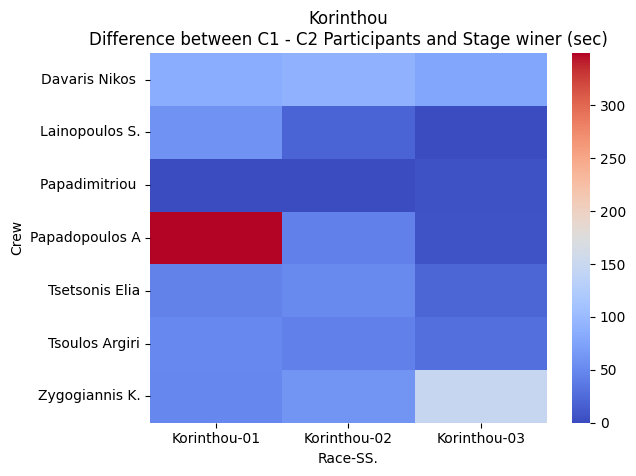

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDifference between C1 - C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

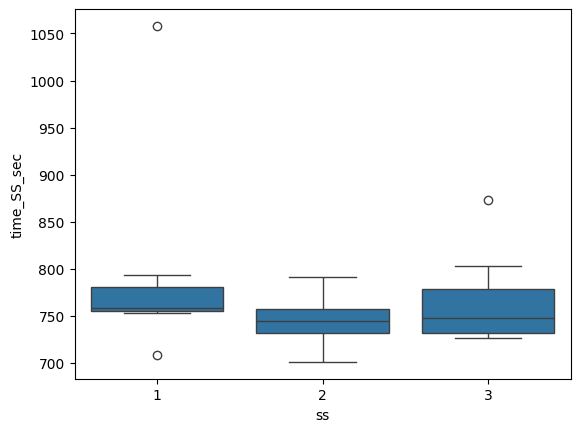

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

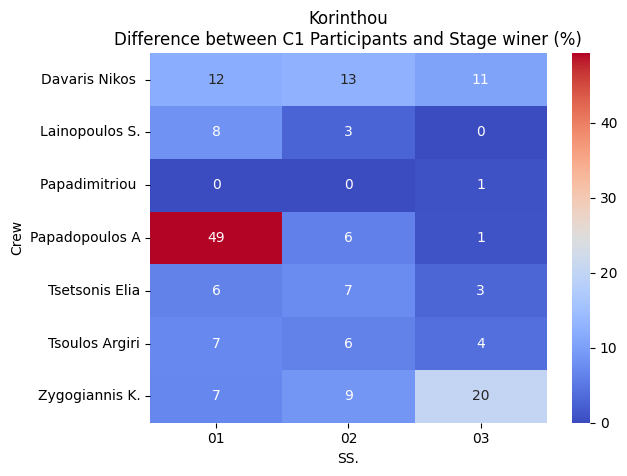

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDifference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")